# Step 3: Data Analysis, Interpretation and Visualization
The data used in this notebook were collected directly from the TMDB API and made available in .CSV format.

#### Importing the libraries

In [123]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#### Loading dataset

In [124]:
df = pd.read_csv("df_final.csv")

In [125]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [126]:
df.tail(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5312,100000000,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://family.foxmovies.com/movies/spies-in-d...,431693,"[{'id': 470, 'name': 'spy'}, {'id': 1436, 'nam...",en,Spies in Disguise,Super spy Lance Sterling and scientist Walter ...,51.725,"[{'id': 7076, 'logo_path': '/8BFxn9NUWSgp0ndih...",...,171616764,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Super Spy. Super Fly.,Spies in Disguise,7.7,2279,"[{'adult': False, 'gender': 2, 'id': 2888, 'kn...","[{'adult': False, 'gender': 1, 'id': 611, 'kno..."
5313,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.littlewomen.movie/,331482,"[{'id': 242, 'name': 'new york city'}, {'id': ...",en,Little Women,Four sisters come of age in America in the aft...,39.646,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",...,216601214,NaN,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Own your story,Little Women,7.9,4809,"[{'adult': False, 'gender': 1, 'id': 36592, 'k...","[{'adult': False, 'gender': 2, 'id': 376, 'kno..."
5314,100000000,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://www.1917.movie/,530915,"[{'id': 2504, 'name': 'world war i'}, {'id': 4...",en,1917,"At the height of the First World War, two youn...",37.265,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",...,374733942,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Time is the enemy,1917,8.0,9744,"[{'adult': False, 'gender': 2, 'id': 146750, '...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
5315,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.justmercyfilm.net/,522212,"[{'id': 934, 'name': 'judge'}, {'id': 6139, 'n...",en,Just Mercy,The powerful true story of Harvard-educated la...,12.833,"[{'id': 32555, 'logo_path': None, 'name': 'Net...",...,50401502,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has its hero. Meet ours.,Just Mercy,8.0,1712,"[{'adult': False, 'gender': 2, 'id': 135651, '...","[{'adult': False, 'gender': 0, 'id': 297, 'kno..."
5316,0,"[{'id': 18, 'name': 'Drama'}]",NaN,565307,"[{'id': 378, 'name': 'prison'}, {'id': 2501, '...",en,Clemency,Years of carrying out death row executions hav...,5.873,"[{'id': 112399, 'logo_path': '/plWc00ADe9sk3sr...",...,309776,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Murder: How do we feel about it?,Clemency,6.6,68,"[{'adult': False, 'gender': 1, 'id': 1981, 'kn...","[{'adult': False, 'gender': 1, 'id': 1981, 'kn..."


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5317 non-null   int64  
 1   genres                5317 non-null   object 
 2   homepage              2122 non-null   object 
 3   id                    5317 non-null   int64  
 4   keywords              5317 non-null   object 
 5   original_language     5317 non-null   object 
 6   original_title        5317 non-null   object 
 7   overview              5314 non-null   object 
 8   popularity            5317 non-null   float64
 9   production_companies  5317 non-null   object 
 10  production_countries  5317 non-null   object 
 11  release_date          5316 non-null   object 
 12  revenue               5317 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5317 non-null   object 
 15  status               

#### Statistical Information

In [128]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.317000e+03,5317.000000,5317.000000,5.317000e+03,4801.000000,5317.000000,5317.000000
mean,2.921428e+07,94389.301110,23.432974,8.482295e+07,106.875859,6.135095,829.457965
std,4.192426e+07,146411.796686,39.670881,1.755268e+08,22.611935,1.176824,1583.607214
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.450000e+05,9464.000000,5.258726,0.000000e+00,94.000000,5.600000,62.000000
50%,1.400000e+07,18713.000000,13.668633,1.825342e+07,103.000000,6.300000,269.000000
75%,4.000000e+07,96399.000000,29.257137,9.221931e+07,118.000000,6.900000,862.000000
max,3.800000e+08,919689.000000,1092.098000,2.797801e+09,338.000000,10.000000,24607.000000


In [129]:
df.describe(include="O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5317,2122,5317,5317,5317,5314,5317,5317,5316,5317,5317,4408,5317,5317,5317
unique,1444,2096,4700,37,5296,5302,4189,558,3596,642,3,4374,5286,5272,5287
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Batman,Dr. Louis Creed's family moves into the countr...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Burn,[],[]
freq,370,4,443,5003,2,2,359,2977,10,3171,5309,4,2,44,29


#### Data dictionary

In [130]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

* **budget**: Movies Budget in Dollars
* **genres**: List of Dictionaries with all genres associated with the movie
* **homepage**: Official website of the film
* **id**: Identification (ID) of the movie
* **keywords**: Keywords associated with the movie
* **original_language**: Original language of the film
* **original_title**: Original title of the movie
* **overview**: Brief description of the film
* **popularity**: Score given by TMDB
* **production_companies**: Production companies involved in the production of the film
* **release_data**: Movie Release Date
* **revenue**: Total movie revenue in dollars
* **runtime**: Movie runtime in minutes
* **spoken_language**: Languages ​​spoken in the film
* **status**: Movie status (released, to be released, announced, etc)
* **tagline**: Movie tagline
* **title**: Official title of the film
* **vote_average**: Average rating of the movie
* **vote_count**: Number of votes counted by TMDB
* **cast**: Cast of the film
* **crew**: Technical Team

#### Missing Data

In [131]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3195
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                  516
spoken_languages           0
status                     0
tagline                  909
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

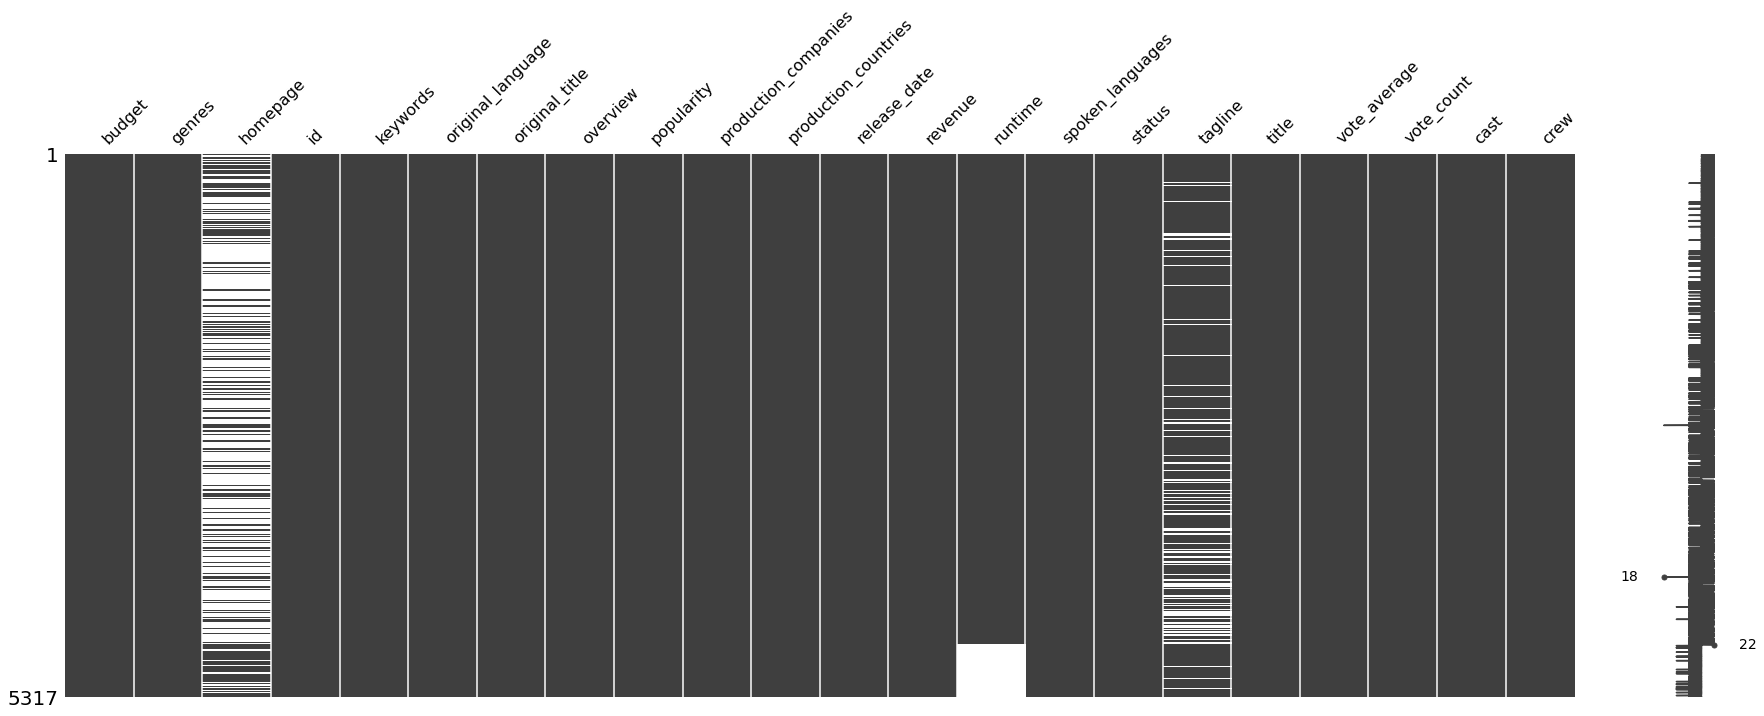

In [132]:
missingno.matrix(df, figsize=(30,10))

In [133]:
df.isnull().sum().sort_values(ascending=False)

homepage                3195
tagline                  909
runtime                  516
overview                   3
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [134]:
df[df.isnull().any(axis=1)].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...",...,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"[{""cast_id"": 1, ""character"": ""Prince Caspian"",...","[{""credit_id"": ""55a239e69251412979002e8b"", ""de..."
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...",...,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de..."
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,"[{""cast_id"": 3, ""character"": ""Lieutenant Alex ...","[{""credit_id"": ""52fe469ec3a36847f8108d45"", ""de..."
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."


In [135]:
df.shape

(5317, 22)

In [136]:
type(df.shape)

tuple

In [137]:
lines, columns = df.shape

In [138]:
print(lines)

5317


In [139]:
print(columns)

22


In [140]:
missing_percent = (df.isnull().sum()/lines) * 100
print(missing_percent)

budget                   0.000000
genres                   0.000000
homepage                60.090276
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.056423
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.018808
revenue                  0.000000
runtime                  9.704721
spoken_languages         0.000000
status                   0.000000
tagline                 17.096107
title                    0.000000
vote_average             0.000000
vote_count               0.000000
cast                     0.000000
crew                     0.000000
dtype: float64


#### Duplicate Data

In [141]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


### Starting to evaluating each feature

#### **budget**: Movies Budget in Dollars

In [142]:
df["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [143]:
type(df["budget"])

pandas.core.series.Series

In [144]:
type(df)

pandas.core.frame.DataFrame

In [145]:
df["budget"].dtypes

dtype('int64')

In [146]:
df["budget"].describe().round(2)

count    5.317000e+03
mean     2.921428e+07
std      4.192426e+07
min      0.000000e+00
25%      2.450000e+05
50%      1.400000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [147]:
df['budget'].min()

0

In [148]:
df['budget'].max()

380000000

In [149]:
df['budget'].std()

41924258.13897683

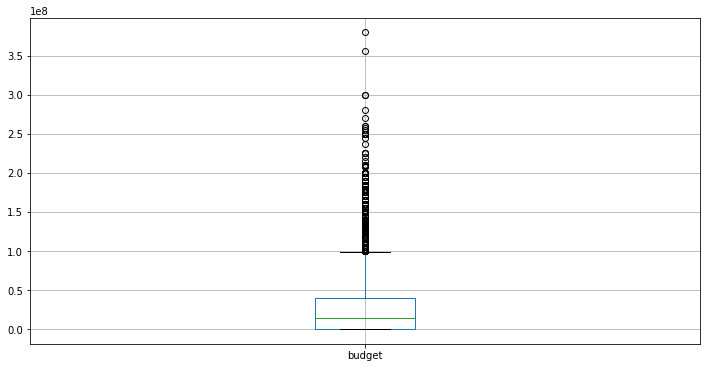

In [150]:
plt.figure(figsize=(12,6))
df.boxplot('budget')
plt.show()

#### **genres**: List of Dictionaries with all genres associated with the movie

In [151]:
df["genres"].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [152]:
type(df["genres"])

pandas.core.series.Series

In [153]:
df["genres"].dtypes

dtype('O')

In [154]:
#df["genres"].info()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5317 non-null   int64  
 1   genres                5317 non-null   object 
 2   homepage              2122 non-null   object 
 3   id                    5317 non-null   int64  
 4   keywords              5317 non-null   object 
 5   original_language     5317 non-null   object 
 6   original_title        5317 non-null   object 
 7   overview              5314 non-null   object 
 8   popularity            5317 non-null   float64
 9   production_companies  5317 non-null   object 
 10  production_countries  5317 non-null   object 
 11  release_date          5316 non-null   object 
 12  revenue               5317 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5317 non-null   object 
 15  status               

#### **homepage**: Official website of the film

In [156]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

In [157]:
df["homepage"].dtypes

dtype('O')

In [158]:
df.isnull().sum().sort_values(ascending=False)

homepage                3195
tagline                  909
runtime                  516
overview                   3
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

#### **id**: Identification (ID) of the movie

In [159]:
df["id"].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [160]:
df["id"].dtypes

dtype('int64')

In [161]:
df["id"].describe()

count      5317.000000
mean      94389.301110
std      146411.796686
min           5.000000
25%        9464.000000
50%       18713.000000
75%       96399.000000
max      919689.000000
Name: id, dtype: float64

#### **keywords**: Keywords associated with the movie

In [162]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [163]:
df["keywords"].dtypes

dtype('O')

#### **original_language**: Original language of the movie

In [164]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [165]:
df["original_language"].nunique()

37

In [166]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

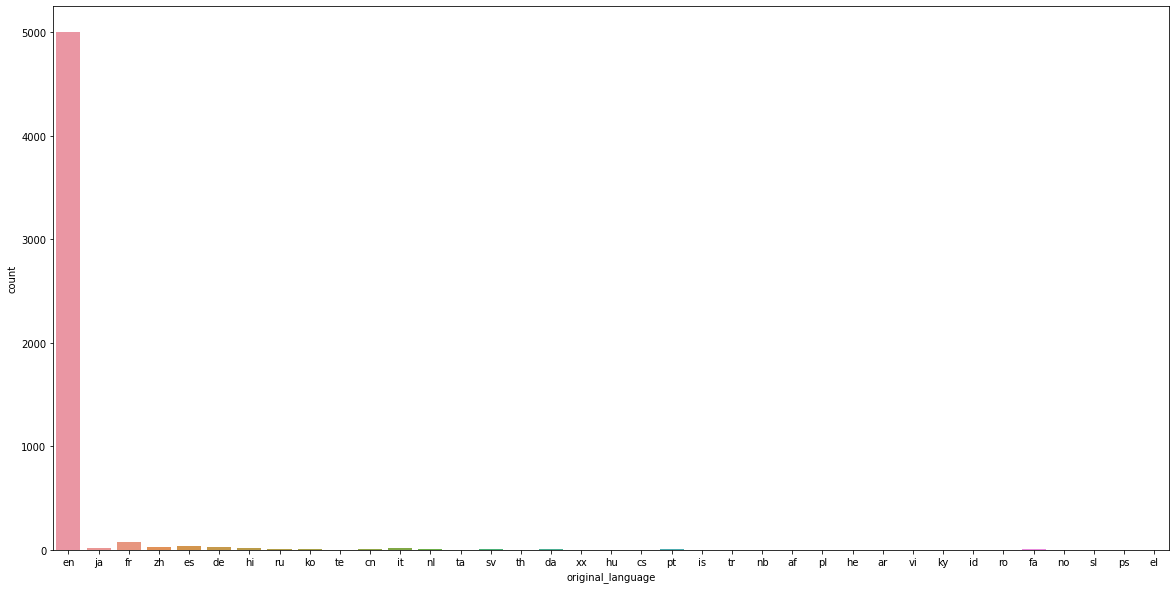

In [167]:
plt.figure(figsize=(20,10))
sns.countplot(x = "original_language", data=df)
plt.show()

In [168]:
df["original_language"].value_counts()

en    5003
fr      73
es      36
zh      28
de      28
ja      20
hi      19
it      14
cn      12
ru      11
ko      11
pt      10
da       7
sv       5
nl       4
fa       4
th       3
he       3
ar       3
ta       2
cs       2
tr       2
ro       2
id       2
ky       1
sl       1
ps       1
no       1
hu       1
vi       1
pl       1
af       1
nb       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [169]:
df["original_language"].describe()

count     5317
unique      37
top         en
freq      5003
Name: original_language, dtype: object

#### **original_title**: Original movie title

In [170]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [171]:
df["original_title"].dtypes

dtype('O')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5317 non-null   int64  
 1   genres                5317 non-null   object 
 2   homepage              2122 non-null   object 
 3   id                    5317 non-null   int64  
 4   keywords              5317 non-null   object 
 5   original_language     5317 non-null   object 
 6   original_title        5317 non-null   object 
 7   overview              5314 non-null   object 
 8   popularity            5317 non-null   float64
 9   production_companies  5317 non-null   object 
 10  production_countries  5317 non-null   object 
 11  release_date          5316 non-null   object 
 12  revenue               5317 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5317 non-null   object 
 15  status               

In [173]:
df["original_title"].nunique()

5296

In [174]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., '1917', 'Just Mercy', 'Clemency'], dtype=object)

In [175]:
df["original_title"].count()

5317

In [176]:
df["original_title"].describe()

count       5317
unique      5296
top       Batman
freq           2
Name: original_title, dtype: object

#### **overview**: Brief description of the film

In [177]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [178]:
df["overview"].nunique()

5302

In [179]:
df["overview"].shape

(5317,)

In [180]:
df["overview"].describe()

count                                                  5314
unique                                                 5302
top       Dr. Louis Creed's family moves into the countr...
freq                                                      2
Name: overview, dtype: object

In [181]:
df["overview"].dtypes

dtype('O')

#####**popularity**: Score given by TMDB

In [182]:
df["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [183]:
df["popularity"].dtypes

dtype('float64')

In [184]:
df["popularity"].describe()

count    5317.000000
mean       23.432974
std        39.670881
min         0.000000
25%         5.258726
50%        13.668633
75%        29.257137
max      1092.098000
Name: popularity, dtype: float64

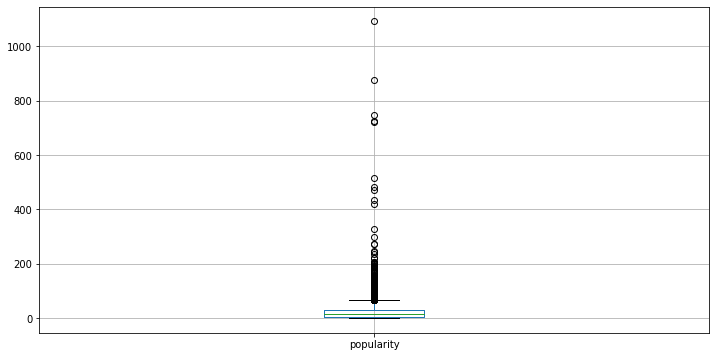

In [185]:
plt.figure(figsize=(12,6))
df.boxplot('popularity')
plt.show()

#### **production_companies**: Production companies involved in the production of the film

In [186]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

In [187]:
df["production_companies"].dtypes

dtype('O')

In [188]:
df["production_companies"].describe()

count     5317
unique    4189
top         []
freq       359
Name: production_companies, dtype: object

#### **release_date**: Movie Release Date

In [189]:
df["release_date"].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [190]:
df["release_date"].dtypes

dtype('O')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5317 non-null   int64  
 1   genres                5317 non-null   object 
 2   homepage              2122 non-null   object 
 3   id                    5317 non-null   int64  
 4   keywords              5317 non-null   object 
 5   original_language     5317 non-null   object 
 6   original_title        5317 non-null   object 
 7   overview              5314 non-null   object 
 8   popularity            5317 non-null   float64
 9   production_companies  5317 non-null   object 
 10  production_countries  5317 non-null   object 
 11  release_date          5316 non-null   object 
 12  revenue               5317 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5317 non-null   object 
 15  status               

In [192]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [193]:
df["release_date"].dtypes

dtype('<M8[ns]')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5317 non-null   int64         
 1   genres                5317 non-null   object        
 2   homepage              2122 non-null   object        
 3   id                    5317 non-null   int64         
 4   keywords              5317 non-null   object        
 5   original_language     5317 non-null   object        
 6   original_title        5317 non-null   object        
 7   overview              5314 non-null   object        
 8   popularity            5317 non-null   float64       
 9   production_companies  5317 non-null   object        
 10  production_countries  5317 non-null   object        
 11  release_date          5316 non-null   datetime64[ns]
 12  revenue               5317 non-null   int64         
 13  runtime           

In [195]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    5316
unique                   3596
top       2006-01-01 00:00:00
freq                       10
first     1913-05-01 00:00:00
last      2022-02-11 00:00:00
Name: release_date, dtype: object

In [196]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [197]:
df[df["release_date"] == "2021-10-28 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [198]:
df[df["release_date"] == "1913-05-01 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4829,0,[],NaN,190746,[],en,Kri,Kri-Kri fools his friend by pretending to be h...,0.6,[],...,0,NaN,[],Released,NaN,Kri Kri's House,0.0,0,"[{'adult': False, 'gender': 0, 'id': 1121474, ...",[]


#### **revenue**: Total movie revenue in dollars

In [199]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [200]:
df["revenue"].describe().round(2)

count    5.317000e+03
mean     8.482295e+07
std      1.755268e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.825342e+07
75%      9.221931e+07
max      2.797801e+09
Name: revenue, dtype: float64

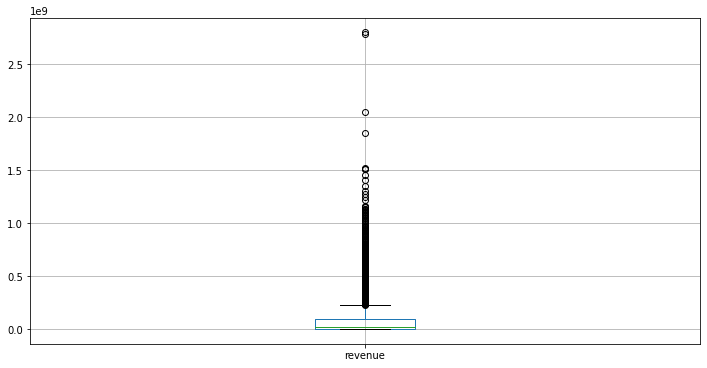

In [201]:
plt.figure(figsize=(12,6))
df.boxplot("revenue")
plt.show()

#### **runtime**: Movie runtime in minutes

In [202]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [203]:
df["runtime"].dtypes

dtype('float64')

In [204]:
df["runtime"].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [205]:
df.isnull().sum().sort_values(ascending=False)

homepage                3195
tagline                  909
runtime                  516
overview                   3
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [206]:
df[df["runtime"] == 338.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...",...,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,"[{""cast_id"": 4, ""character"": ""Ilich Ram\u00edr...","[{""credit_id"": ""57352b61c3a3680253000870"", ""de..."


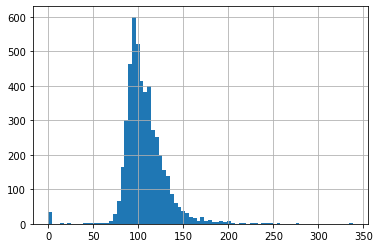

In [207]:
df["runtime"].hist(bins=80)

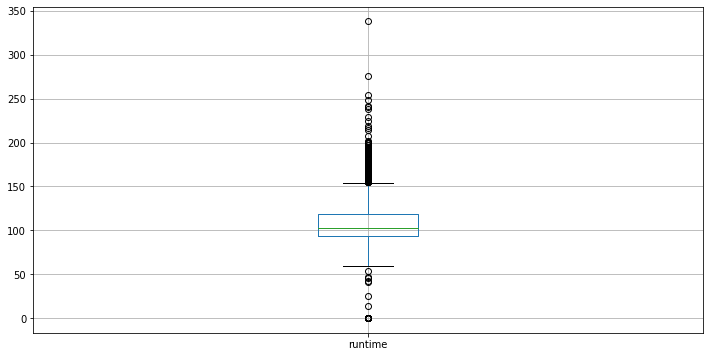

In [208]:
plt.figure(figsize=(12,6))
df.boxplot("runtime")
plt.show()

#### **spoken_languages**: Languages spoken in the film

In [209]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [210]:
df["spoken_languages"].dtypes

dtype('O')

#### **status**: Movie status (released, to be released, announced, etc)

In [211]:
df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [212]:
df["status"].nunique()

3

In [213]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [214]:
df["status"].value_counts()

Released           5309
Rumored               5
Post Production       3
Name: status, dtype: int64

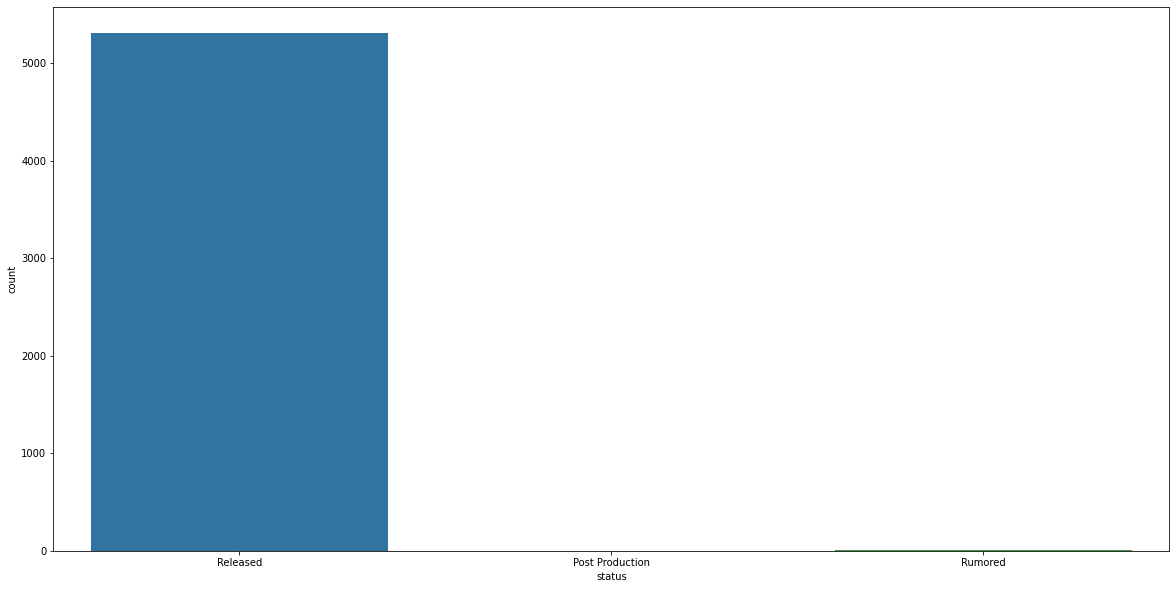

In [215]:
plt.figure(figsize = (20,10))
sns.countplot(x="status", data=df)
plt.show()

#### **tagline**: Movie tagline

In [216]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [217]:
df['tagline'].describe()

count                       4408
unique                      4374
top       Based on a true story.
freq                           4
Name: tagline, dtype: object

#### **title**: Official movie title

In [218]:
df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [219]:
df["title"].dtypes

dtype('O')

In [220]:
df["title"].nunique()

5286

In [221]:
df["title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., '1917', 'Just Mercy', 'Clemency'], dtype=object)

#### **vote_average**: Average rating of the movie

In [222]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [223]:
df['vote_average'].dtypes

dtype('float64')

In [224]:
df['vote_average'].describe()

count    5317.000000
mean        6.135095
std         1.176824
min         0.000000
25%         5.600000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

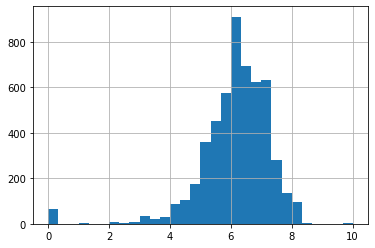

In [225]:
df['vote_average'].hist(bins=30)

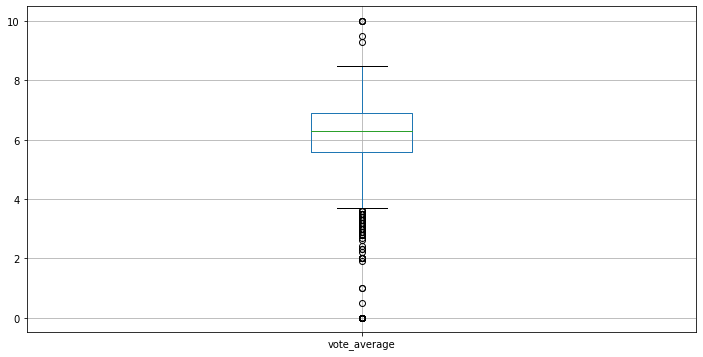

In [226]:
plt.figure(figsize=(12,6))
df.boxplot("vote_average")
plt.show()

In [227]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [228]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],...,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],...,0,90.0,[],Released,NaN,Dutch Kills,0.0,0,"[{""cast_id"": 4, ""character"": ""Val"", ""credit_id...","[{""credit_id"": ""563d13ec9251414c70007d5e"", ""de..."
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],...,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0,"[{""cast_id"": 8, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""549e790a9251414d27003096"", ""de..."
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",NaN,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...",...,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0,"[{""cast_id"": 3, ""character"": ""Mimi"", ""credit_i...","[{""credit_id"": ""545f8107c3a3686cbb0041fd"", ""de..."
4829,0,[],NaN,190746,[],en,Kri,Kri-Kri fools his friend by pretending to be h...,0.600000,[],...,0,NaN,[],Released,NaN,Kri Kri's House,0.0,0,"[{'adult': False, 'gender': 0, 'id': 1121474, ...",[]


#### **vote_count**: Number of votes counted by TMDB

In [229]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [230]:
df['vote_count'].dtypes

dtype('int64')

In [231]:
df['vote_count'].describe()

count     5317.000000
mean       829.457965
std       1583.607214
min          0.000000
25%         62.000000
50%        269.000000
75%        862.000000
max      24607.000000
Name: vote_count, dtype: float64

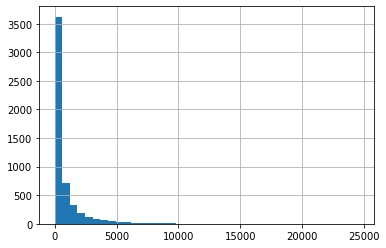

In [232]:
df['vote_count'].hist(bins=40)

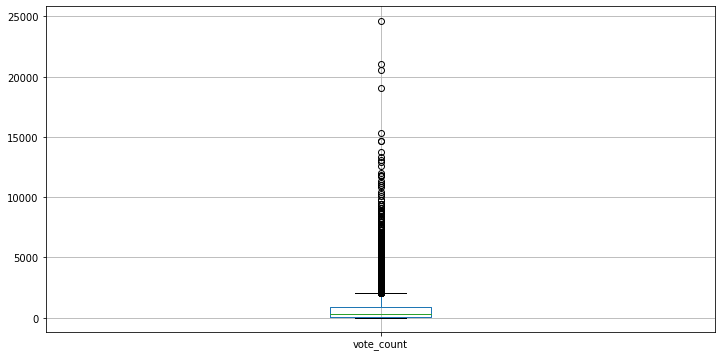

In [233]:
plt.figure(figsize=(12,6))
df.boxplot("vote_count")
plt.show()

In [234]:
df[df["vote_count"] == 22907.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [235]:
q1 = df["vote_count"].quantile(0.25)
q3 = df["vote_count"].quantile(0.75)
IQR = q3 - q1
print(IQR)

800.0


#### **cast**: Cast of the movie

In [236]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [237]:
df["cast"].dtypes

dtype('O')

#### **crew**: Technical Team

In [238]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [239]:
df["crew"].dtypes

dtype('O')

### New phase - Analyzing and interpreting features (columns)

#### Calculating return on movies

In [240]:
df['budget'] = pd.to_numeric(df["budget"], errors="coerce")
df["budget"] = df["budget"].replace(0, np.nan)

In [241]:
df["return"]  = df["revenue"]/df["budget"]

In [242]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843


In [243]:
df.head().transpose()

,0,1,2,3,4
budget,237000000.0,300000000.0,245000000.0,250000000.0,260000000.0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [244]:
df[df["return"] < 1 ]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
13,255000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,"[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de...",0.350157
73,175000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",http://www.evanalmighty.com/,2698,"[{""id"": 494, ""name"": ""father son relationship""...",en,Evan Almighty,God contacts Congressman Evan Baxter and tells...,27.082182,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A comedy of biblical proportions,Evan Almighty,5.3,1151,"[{""cast_id"": 19, ""character"": ""Evan Baxter"", ""...","[{""credit_id"": ""52fe4365c3a36847f805145d"", ""de...",0.988571
83,27000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...",...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de...",0.000000
84,175000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,64686,"[{""id"": 233, ""name"": ""japan""}, {""id"": 236, ""na...",en,47 Ronin,"Based on the original 1941 movie from Japan, a...",41.796339,"[{""name"": ""Mid Atlantic Films"", ""id"": 2735}, {...",...,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,For courage. For loyalty. For honor.,47 Ronin,5.9,1326,"[{""cast_id"": 1001, ""character"": ""Kai"", ""credit...","[{""credit_id"": ""52fe46e4c3a368484e0a98ef"", ""de...",0.862643
135,150000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de...",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,514921,"[{'id': 3124, 'name': 'cloud'}, {'id': 3497, '...",en,The Aeronauts,"In 1862, daredevil balloon pilot Amelia Wren t...",16.712000,"[{'id': 20580, 'logo_path': '/oRR9EXVoKP9szDkV...",...,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Aeronauts,6.8,849,"[{'adult': False, 'gender': 2, 'id': 37632, 'k...","[{'adult': False, 'gender': 2, 'id': 7052, 'kn...",0.000000
5302,45000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.richardjewellmovie.net,292011,"[{'id': 5565, 'name': 'biography'}, {'id': 269...",en,Richard Jewell,"Richard Jewell thinks quick, works fast, and s...",15.391000,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",...,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The world will know his name and the truth.,Richard Jewell,7.5,1934,"[{'adult': False, 'gender': 2, 'id': 1294982, ...","[{'adult': False, 'gender': 2, 'id': 190, 'kno...",0.753436
5304,150000000

In [245]:
df["return"].describe().round(2)

count       4074.00
mean        2342.28
std       134085.24
min            0.00
25%            0.51
50%            1.88
75%            3.99
max      8500000.00
Name: return, dtype: float64

In [246]:
df[df["return"] == 8500000.00]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
4238,1.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.27648,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,"[{""cast_id"": 8, ""character"": ""A factory worker...","[{""credit_id"": ""5621aeadc3a3680e1d00a09a"", ""de...",8500000.0


#### Creating a column with just the year

In [247]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4074 non-null   float64       
 1   genres                5317 non-null   object        
 2   homepage              2122 non-null   object        
 3   id                    5317 non-null   int64         
 4   keywords              5317 non-null   object        
 5   original_language     5317 non-null   object        
 6   original_title        5317 non-null   object        
 7   overview              5314 non-null   object        
 8   popularity            5317 non-null   float64       
 9   production_companies  5317 non-null   object        
 10  production_countries  5317 non-null   object        
 11  release_date          5316 non-null   datetime64[ns]
 12  revenue               5317 non-null   int64         
 13  runtime           

In [249]:
df.isnull().sum()

budget                  1243
genres                     0
homepage                3195
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                  516
spoken_languages           0
status                     0
tagline                  909
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1243
year                       1
dtype: int64

In [250]:
df[df["year"].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
4553,NaN,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,[],Released,NaN,America Is Still the Place,0.0,0,[],[],NaN,NaN


In [251]:
df.drop(index = 4553, inplace=True)

In [252]:
df.isnull().sum()

budget                  1242
genres                     0
homepage                3194
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                  516
spoken_languages           0
status                     0
tagline                  908
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1242
year                       0
dtype: int64

In [253]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0


In [254]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
4238,Modern Times,1936.0,8.500000e+06
3137,Nurse 3-D,2013.0,1.000000e+06
4577,Paranormal Activity,2007.0,1.289039e+04
4582,Tarnation,2003.0,5.330339e+03
4496,The Blair Witch Project,1999.0,4.133333e+03


#### Do some words appear more frequently in the Title and Overview of the movie?

In [255]:
df["title"] = df["title"].astype("str")

In [256]:
title_corpus = " ".join(df["title"])

In [257]:
print(title_corpus)

Avatar Pirates of the Caribbean: At World's End Spectre The Dark Knight Rises John Carter Spider-Man 3 Tangled Avengers: Age of Ultron Harry Potter and the Half-Blood Prince Batman v Superman: Dawn of Justice Superman Returns Quantum of Solace Pirates of the Caribbean: Dead Man's Chest The Lone Ranger Man of Steel The Chronicles of Narnia: Prince Caspian The Avengers Pirates of the Caribbean: On Stranger Tides Men in Black 3 The Hobbit: The Battle of the Five Armies The Amazing Spider-Man Robin Hood The Hobbit: The Desolation of Smaug The Golden Compass King Kong Titanic Captain America: Civil War Battleship Jurassic World Skyfall Spider-Man 2 Iron Man 3 Alice in Wonderland X-Men: The Last Stand Monsters University Transformers: Revenge of the Fallen Transformers: Age of Extinction Oz: The Great and Powerful The Amazing Spider-Man 2 TRON: Legacy Cars 2 Green Lantern Toy Story 3 Terminator Salvation Furious 7 World War Z X-Men: Days of Future Past Star Trek Into Darkness Jack the Giant 

In [258]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_corpus)

In [259]:
title_wordcloud

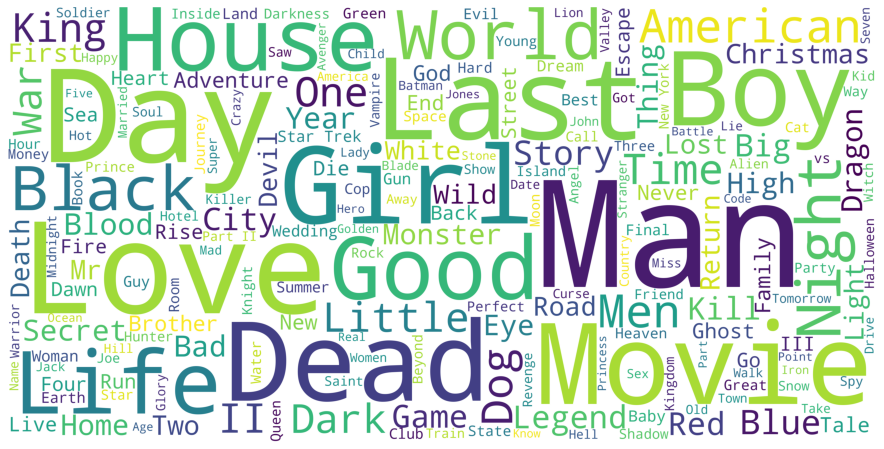

In [260]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### And in the overview?

In [261]:
df["overview"] = df["overview"].astype("str")

In [262]:
overview_corpus = " ".join(df["overview"])

In [263]:
print(overview_corpus)

 It's the fictional tale of a wayward 9th grader, Ralph (Adam Butcher), who is secretly living on his own while his widowed, hospitalized mother remains immersed in a coma. Frequently in trouble with Father Fitzpatrick (Gordon Pinsent), the principal of his all-boys, Catholic school, Ralph is considered something of a joke among peers until he decides to pull off a miracle that could save his mother, i.e., winning the Boston Marathon.  Coached by a younger priest and former runner, Father Hibbert (Campbell Scott), whose cynicism has been lifted by the boy's pure hope, Ralph applies himself to his unlikely mission, fending off naysayers and getting help along a very challenging path from sundry allies and friends. Over the course of a midsummer night in Fermanagh in 1890, an unsettled daughter of the Anglo-Irish aristocracy encourages her father's valet to seduce her. Young writer, Richard Collier is met on the opening night of his first play by an old lady who begs him to, "Come back t

In [264]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(overview_corpus)

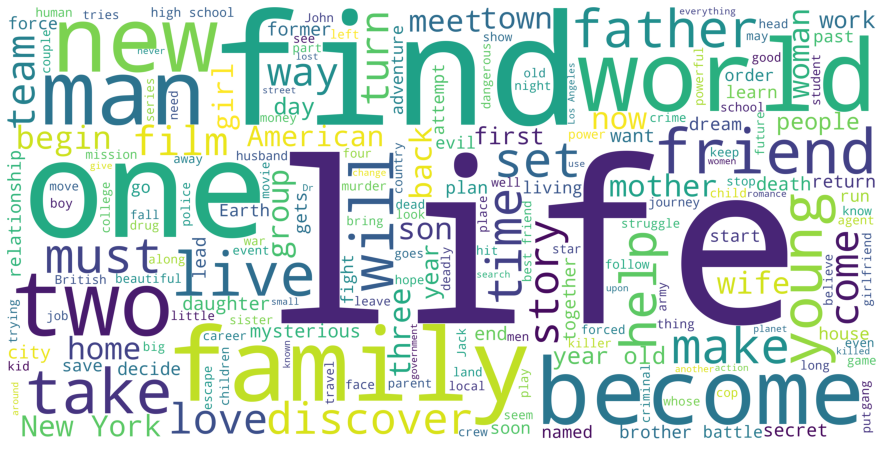

In [265]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

#### What are the main words used in movies with a return above 5

In [266]:
df_return = df[df["return"] > 5]

In [267]:
df_return.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
7,280000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",5.019299,2015.0
12,200000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,"[{""cast_id"": 37, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""52fe4211c3a36847f8001873"", ""de...",5.328299,2006.0
16,220000000.0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",6.907081,2012.0
25,200000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",9.225171,1997.0


In [268]:
df_return["title"] = df["title"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
title_c = " ".join(df_return["title"])

In [270]:
title_wordcloud_return_5 = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_c)

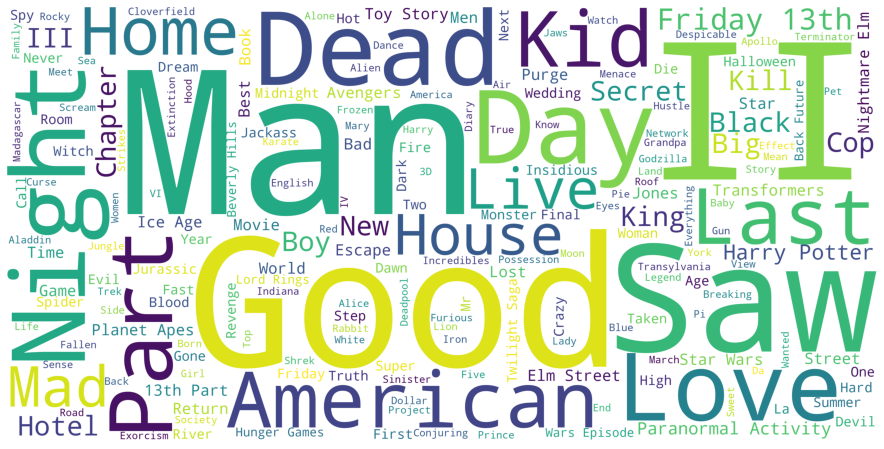

In [271]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud_return_5)
plt.axis('off')
plt.show()

#### What are the most representative languages?

In [272]:
lang_df = pd.DataFrame(df["original_language"].value_counts())
lang_df["language"] = lang_df.index 
lang_df.columns = ["number", 'language']
lang_df.head()

,number,language
en,5002,en
fr,73,fr
es,36,es
zh,28,zh
de,28,de


In [273]:
df["original_language"].nunique()

37

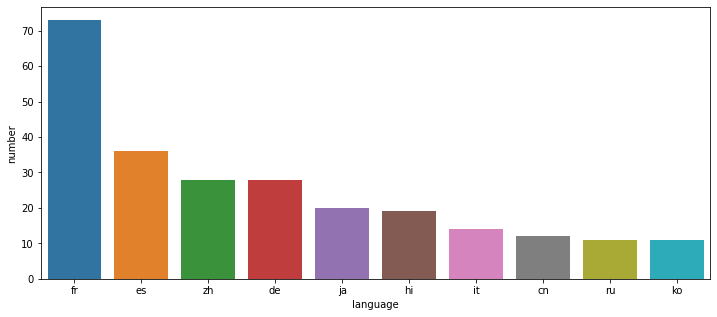

In [274]:
plt.figure(figsize=(12,5))
sns.barplot(x = "language", y = "number", data=lang_df[1:11])

#### popularity

In [275]:
df["popularity"].describe()

count    5316.000000
mean       23.437382
std        39.673310
min         0.000372
25%         5.259370
50%        13.684316
75%        29.258190
max      1092.098000
Name: popularity, dtype: float64

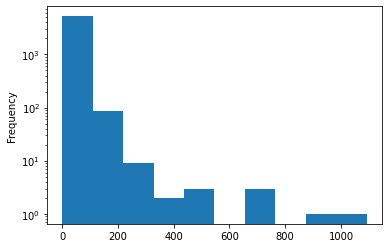

In [276]:
df["popularity"].plot(logy=True, kind='hist')

In [277]:
df[["original_title", "popularity", "year"]].sort_values("popularity", ascending=False).head(20)

,original_title,popularity,year
4841,Annihilation,1092.098000,2021.0
546,Minions,875.581305,2015.0
5256,The King,746.090000,2021.0
95,Interstellar,724.247784,2014.0
5141,Family,720.633000,2021.0
788,Deadpool,514.569956,2016.0
94,Guardians of the Galaxy,481.098624,2014.0
4894,Avengers: Infinity War,472.017000,2018.0
127,Mad Max: Fury Road,434.278564,2015.0
28,Jurassic World,418.708552,2015.0


#### vote Count

In [278]:
df[["title", 'vote_count', 'year']].sort_values("vote_count", ascending=False).head(10)

,title,vote_count,year
4894,Avengers: Infinity War,24607,2018.0
5145,Avengers: Endgame,21044,2019.0
5247,Joker,20572,2019.0
4833,Black Panther,19066,2018.0
5199,The Lion King,15312,1994.0
4908,Deadpool 2,14679,2018.0
5032,Bohemian Rhapsody,14641,2018.0
96,Inception,13752,2010.0
5010,Venom,13332,2018.0
5106,Captain Marvel,13068,2019.0


#### vote average

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


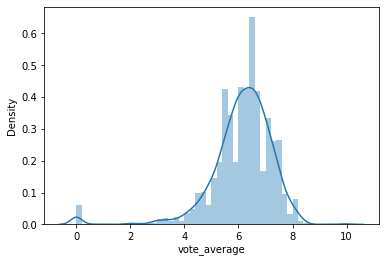

In [279]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

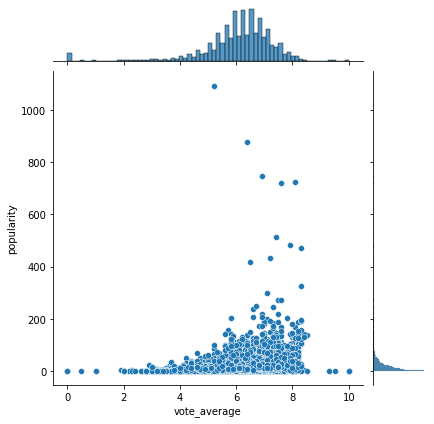

In [280]:
sns.jointplot(x='vote_average', y="popularity", data=df)

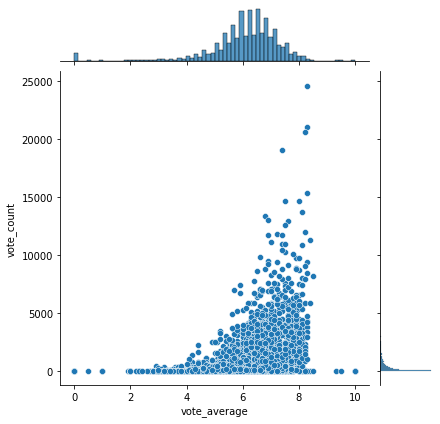

In [281]:
sns.jointplot(x='vote_average', y="vote_count", data=df)

#### Which months are most movies released

In [282]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012.0


In [283]:
df['month'] = pd.DatetimeIndex(df["release_date"]).month

In [284]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,cast,crew,return,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0,12
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0,5
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015.0,10
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012.0,7
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012.0,3


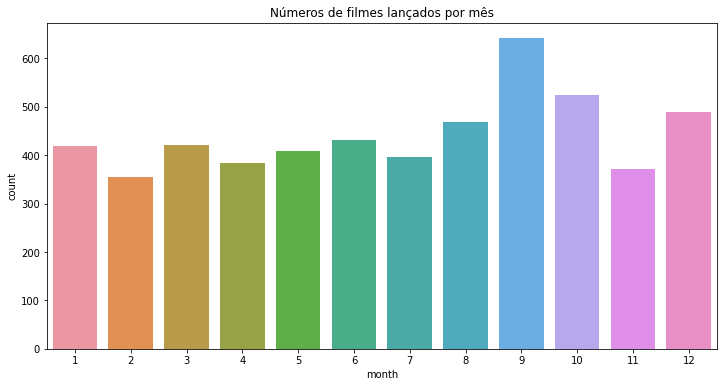

In [285]:
plt.figure(figsize=(12,6))
plt.title("Números de filmes lançados por mês")
sns.countplot(x="month", data=df)

(0.0, 12.0)

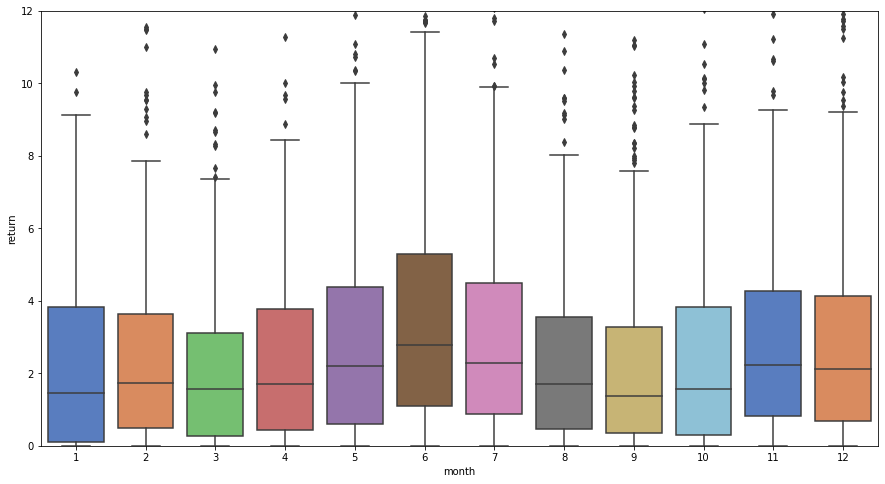

In [286]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.boxplot(x="month", y='return', data=df[df["return"].notnull()], palette="muted", ax=ax)
ax.set_ylim([0, 12])

#### number of movies released per year

In [287]:
year_count = df.groupby('year')["original_title"].count()

In [288]:
year_count

year
1913.0      1
1916.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2018.0    240
2019.0    212
2020.0      2
2021.0     13
2022.0      1
Name: original_title, Length: 96, dtype: int64

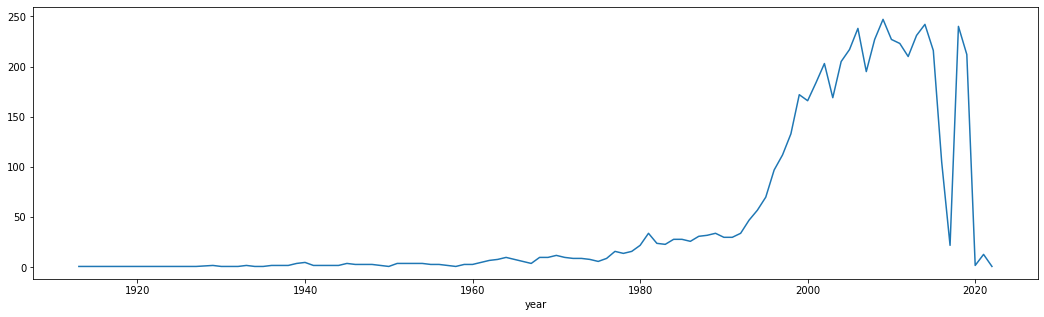

In [289]:
plt.figure(figsize=(18,5))
year_count.plot()

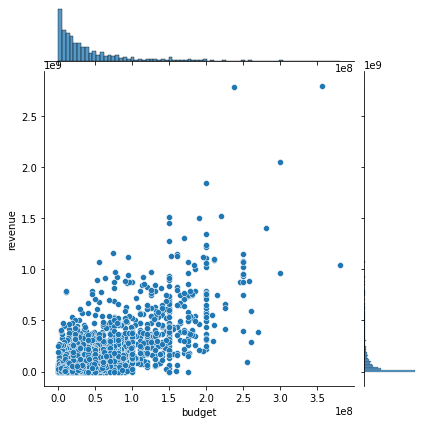

In [290]:
sns.jointplot(x='budget', y="revenue", data=df[df["return"].notnull()])